# Financial distress prediction

**Credit: [AITS Cainvas Community](https://discord.gg/x6xn39u)**

![](https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/finance_distress_prediction.gif)

*Photo by [Shunya Koide](https://dribbble.com/shots/10820830-Investment-Simple-Loop-Animation) on [Dribbble](https://dribbble.com)*

Predicting whether a given company is under financial distress or not based on time based data for different companies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from keras import optimizers, layers, models, losses, callbacks

# The dataset

[On Kaggle](https://www.kaggle.com/shebrahimi/financial-distress) on [Ebrahimi](https://www.kaggle.com/shebrahimi)

The daatset is a CSV file with finanacial distress prediction for a set of companies.

Along with companies and time periods, there are 83 factors denoted by x1 to x83 that are financial and non-finanacial characterisitcs of the companies. Out of these, x80 is a categorical feature. The 'Financial Distress' column is a continuous variable that can be converted into a two-value column - healthy (0) if value > -0.5, else distressed (1) 

In [2]:
df = pd.read_csv('https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/Financial_Distress.csv')
df

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,422,10,0.438020,2.2605,0.202890,0.16037,0.18588,0.175970,0.198400,2.22360,...,100.000,100.00,100.000,17.125,14.5,-7.0,37,0.436380,4,41
3668,422,11,0.482410,1.9615,0.216440,0.20095,0.21642,0.203590,0.189870,1.93820,...,91.500,130.50,132.400,20.000,14.5,-16.0,37,0.438020,5,42
3669,422,12,0.500770,1.7099,0.207970,0.26136,0.21399,0.193670,0.183890,1.68980,...,87.100,175.90,178.100,20.000,14.5,-20.2,37,0.482410,6,43
3670,422,13,0.611030,1.5590,0.185450,0.30728,0.19307,0.172140,0.170680,1.53890,...,92.900,203.20,204.500,22.000,22.0,6.4,37,0.500770,7,44


In [3]:
# Understanding the data

# There are many time periods for each company.

print(pd.crosstab(df['Company'], df['Time'].sum()))

col_0    27644
Company       
1            4
2           14
3            1
4           14
5           14
...        ...
418          2
419          3
420          3
421          6
422          8

[422 rows x 1 columns]


There are companies with less than 5 time periods too! 

# Preprocessing

## One hot encoding the input variables

In [4]:
df80 = pd.get_dummies(df['x80'], drop_first = True, prefix = '80')

for column in df80.columns:
    df[column] = df80[column]
    
df = df.drop(columns = ['x80'])

df

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,80_28,80_29,80_30,80_31,80_32,80_33,80_34,80_35,80_36,80_37
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,0,0,0,0,0,0,0,0,0,0
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,0,0,0,0,0,0,0,0,0,0
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,0,0,0,0,0,0,0,0,0,0
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,422,10,0.438020,2.2605,0.202890,0.16037,0.18588,0.175970,0.198400,2.22360,...,0,0,0,0,0,0,0,0,0,1
3668,422,11,0.482410,1.9615,0.216440,0.20095,0.21642,0.203590,0.189870,1.93820,...,0,0,0,0,0,0,0,0,0,1
3669,422,12,0.500770,1.7099,0.207970,0.26136,0.21399,0.193670,0.183890,1.68980,...,0,0,0,0,0,0,0,0,0,1
3670,422,13,0.611030,1.5590,0.185450,0.30728,0.19307,0.172140,0.170680,1.53890,...,0,0,0,0,0,0,0,0,0,1


## Creating time-based dataframe

Since this is a time based dataset, the features are appended to include values for previous timesteps of the same company group.

In [5]:
# Defining the time window, that is, how many timesteps to include
time_window = 5

# Dataframes that hold rows grouped by company
df_company_grouped = df.groupby('Company')

# Column values affected by time - all except Company, Time, Financial Distress and x80 (the categorical variable that was one-hot encoded)
time_affected_columns = [c for c in df.columns if c[0] == 'x']    # Starts with x

# Final dataframe
df_final = pd.DataFrame()

# For each company
for company in df_company_grouped:
    # If the comapny has timesteps greater than or equal to the time window, else discard
    if time_window <= len(company[1]):
        # Skipping time_window-1 rows from the beginning, and looping to till the end 
        for row_num in range(time_window, len(company[1])+1):
            # picking the time_window th row
            df_temp = company[1].iloc[row_num-1, :]
            # Appending values from time_window-1 rows before that
            for i in range(time_window-1):                
                df_temp_i = company[1].iloc[row_num-1-i][time_affected_columns]    # Pick necessary columns                
                df_temp = pd.concat([df_temp, df_temp_i], axis = 0)    # Append values
        
            df_temp = df_temp.to_frame().transpose()    # Series to DataFrame

            df_final = pd.concat([df_final, df_temp])    # Add as row to final dataframe

# Reset index            
df_final = df_final.reset_index(drop = True)

## One hot encoding the target variables 

This is done based on the condition - healthy (0) if value > -0.5, else distressed (1)

In [6]:
df_final['Financial Distress'] = (df_final['Financial Distress']<-0.5).astype('int')

In [7]:
df_final['Financial Distress'].value_counts()

0    2091
1      83
Name: Financial Distress, dtype: int64

## Balancing the dataset

With 5 timestep values in one row sample, resampling and training using this dataset without a time series split would be acceptable.

In [8]:
# separating into 2 dataframes, one for each class 

df0 = df_final[df_final['Financial Distress'] == 0]
df1 = df_final[df_final['Financial Distress'] == 1]

print("Number of samples in:")
print("Class label 0 - ", len(df0))
print("Class label 1 - ", len(df1))

# Upsampling 

df1 = df1.sample(1000, replace = True)    # replace = True enables resampling

print('\nAfter resampling - ')

print("Number of samples in:")
print("Class label 0 - ", len(df0))
print("Class label 1 - ", len(df1))

df = df1.append(df0)

Number of samples in:
Class label 0 -  2091
Class label 1 -  83

After resampling - 
Number of samples in:
Class label 0 -  2091
Class label 1 -  1000


In [9]:
df['Financial Distress'].value_counts()

0    2091
1    1000
Name: Financial Distress, dtype: int64

## Defining the input and output columns

In [10]:
# defining the input and output columns to separate the dataset in the later cells.

input_columns = list(df.columns)
input_columns.remove('Financial Distress')
output_columns = ['Financial Distress']

print("Number of input columns: ", len(input_columns))
#print("Input columns: ", ', '.join(input_columns))

print("Number of output columns: ", len(output_columns))
#print("Output columns: ", ', '.join(output_columns))

Number of input columns:  448
Number of output columns:  1


## Train-val-test split

In [11]:
# Splitting into train, val and test set -- 80-10-10 split

# First, an 80-20 split
train_df, val_test_df = train_test_split(df, test_size = 0.2)

# Then split the 20% into half
val_df, test_df = train_test_split(val_test_df, test_size = 0.5)

print("Number of samples in...")
print("Training set: ", len(train_df))
print("Validation set: ", len(val_df))
print("Testing set: ", len(test_df))

Number of samples in...
Training set:  2472
Validation set:  309
Testing set:  310


In [12]:
# Splitting into X (input) and y (output)

Xtrain, ytrain = np.array(train_df[input_columns]), np.array(train_df[output_columns])

Xval, yval = np.array(val_df[input_columns]), np.array(val_df[output_columns])

Xtest, ytest = np.array(test_df[input_columns]), np.array(test_df[output_columns])

## Scaling the values

The values in the feature columns are not of the same range. 

In [13]:
# Each feature has a different range. 
# Using min_max_scaler to scale them to values in the range [0,1].

min_max_scaler = MinMaxScaler()

# Fit on training set alone
Xtrain = min_max_scaler.fit_transform(Xtrain)

# Use it to transform val and test input
Xval = min_max_scaler.transform(Xval)
Xtest = min_max_scaler.transform(Xtest)

# The model

In [14]:
model = models.Sequential([
    layers.Dense(32, activation = 'relu', input_shape = Xtrain[0].shape),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(8, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

cb = [callbacks.EarlyStopping(patience = 5, restore_best_weights = True)]

In [15]:
model.compile(optimizer = optimizers.Adam(0.001), loss = losses.BinaryCrossentropy(), metrics = ['accuracy'])

history = model.fit(Xtrain, ytrain, validation_data = (Xval, yval), epochs = 256, callbacks = cb)

Epoch 1/256
78/78 [==============================] - 0s 3ms/step - loss: 0.5056 - accuracy: 0.7354 - val_loss: 0.3563 - val_accuracy: 0.8706
Epoch 2/256
78/78 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.8710 - val_loss: 0.2320 - val_accuracy: 0.9094
Epoch 3/256
78/78 [==============================] - 0s 2ms/step - loss: 0.2790 - accuracy: 0.8823 - val_loss: 0.2182 - val_accuracy: 0.9061
Epoch 4/256
78/78 [==============================] - 0s 2ms/step - loss: 0.2431 - accuracy: 0.8985 - val_loss: 0.1923 - val_accuracy: 0.9353
Epoch 5/256
78/78 [==============================] - 0s 2ms/step - loss: 0.2336 - accuracy: 0.8993 - val_loss: 0.1991 - val_accuracy: 0.9223
Epoch 6/256
78/78 [==============================] - 0s 2ms/step - loss: 0.2282 - accuracy: 0.9001 - val_loss: 0.2624 - val_accuracy: 0.9094
Epoch 7/256
78/78 [==============================] - 0s 3ms/step - loss: 0.2307 - accuracy: 0.9037 - val_loss: 0.1854 - val_accuracy: 0.9385
Epoch 8/256
7

In [16]:
model.compile(optimizer = optimizers.Adam(0.0001), loss = losses.BinaryCrossentropy(), metrics = ['accuracy'])

history1 = model.fit(Xtrain, ytrain, validation_data = (Xval, yval), epochs = 256, callbacks = cb)

Epoch 1/256
78/78 [==============================] - 0s 3ms/step - loss: 0.1503 - accuracy: 0.9373 - val_loss: 0.1617 - val_accuracy: 0.9482
Epoch 2/256
78/78 [==============================] - 0s 2ms/step - loss: 0.1487 - accuracy: 0.9397 - val_loss: 0.1550 - val_accuracy: 0.9450
Epoch 3/256
78/78 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 0.9377 - val_loss: 0.1557 - val_accuracy: 0.9515
Epoch 4/256
78/78 [==============================] - 0s 2ms/step - loss: 0.1450 - accuracy: 0.9397 - val_loss: 0.1548 - val_accuracy: 0.9482
Epoch 5/256
78/78 [==============================] - 0s 2ms/step - loss: 0.1425 - accuracy: 0.9446 - val_loss: 0.1535 - val_accuracy: 0.9515
Epoch 6/256
78/78 [==============================] - 0s 2ms/step - loss: 0.1418 - accuracy: 0.9430 - val_loss: 0.1583 - val_accuracy: 0.9515
Epoch 7/256
78/78 [==============================] - 0s 2ms/step - loss: 0.1429 - accuracy: 0.9426 - val_loss: 0.1604 - val_accuracy: 0.9515
Epoch 8/256
7

In [17]:
model.evaluate(Xtest, ytest)

10/10 [==============================] - 0s 1ms/step - loss: 0.1736 - accuracy: 0.9323


[0.17363806068897247, 0.9322580695152283]

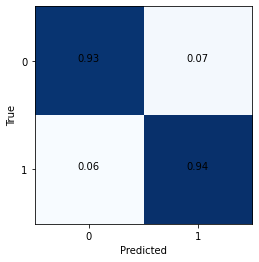

In [18]:
ypred = (model.predict(Xtest)>0.5).astype('int')

cm = confusion_matrix(ytest, ypred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig = plt.figure(figsize = (4, 4))
ax = fig.add_subplot(111)

for i in range(cm.shape[1]):
    for j in range(cm.shape[0]):   
        ax.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="black")

_ = ax.imshow(cm, cmap=plt.cm.Blues)
ax.set_xticks(range(2))
ax.set_yticks(range(2))
ax.set_xticklabels(range(2))
ax.set_yticklabels(range(2))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Plotting the metrics

In [19]:
def plot(history1, history2, variable1, variable2):
    # combining metrics from both trainings    
    var1_history = history1[variable1]
    var1_history.extend(history2[variable1])
    
    var2_history = history1[variable2]
    var2_history.extend(history2[variable2])
    
    # plotting them
    plt.plot(range(len(var1_history)), var1_history)
    plt.plot(range(len(var2_history)), var2_history)
    plt.legend([variable1, variable2])
    plt.title(variable1)

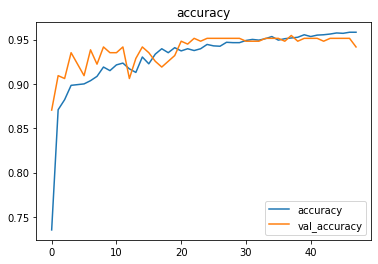

In [20]:
plot(history.history, history1.history, "accuracy", 'val_accuracy')

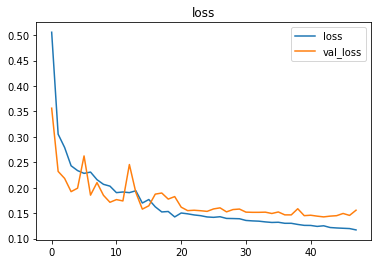

In [21]:
plot(history.history, history1.history, "loss", 'val_loss')

# Prediction

In [22]:
# pick random test data sample from one batch
x = random.randint(0, len(Xtest) - 1)

output = model.predict(Xtest[x].reshape(1, -1))[0][0] 
pred = (output>0.5).astype('int')
print("Predicted: ", pred, "(", output, "-->", pred, ")")    

print("True: ", ytest[x][0])

Predicted:  0 ( 0.00045516551 --> 0 )
True:  0


# deepC

In [23]:
model.save('financial_distress_prediction.h5')

!deepCC financial_distress_prediction.h5

[INFO]
Reading [keras model] 'financial_distress_prediction.h5'
[SUCCESS]
Saved 'financial_distress_prediction.onnx'
[INFO]
Reading [onnx model] 'financial_distress_prediction.onnx'
[INFO]
Model info:
  ir_vesion : 4
  doc       : 
[WARNING]
[ONNX]: terminal (input/output) dense_input's shape is less than 1. Changing it to 1.
[WARNING]
[ONNX]: terminal (input/output) dense_3's shape is less than 1. Changing it to 1.
WARN (GRAPH): found operator node with the same name (dense_3) as io node.
[INFO]
Running DNNC graph sanity check ...
[SUCCESS]
Passed sanity check.
[INFO]
Writing C++ file 'financial_distress_prediction_deepC/financial_distress_prediction.cpp'
[INFO]
deepSea model files are ready in 'financial_distress_prediction_deepC/' 
[RUNNING COMMAND]
g++ -std=c++11 -O3 -fno-rtti -fno-exceptions -I. -I/opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/include -isystem /opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/pac

In [24]:
# pick random test data sample from one batch
x = random.randint(0, len(Xtest) - 1)

np.savetxt('sample.data', Xtest[x])    # xth sample into text file

# run exe with input
!financial_distress_prediction_deepC/financial_distress_prediction.exe sample.data

# show predicted output
nn_out = np.loadtxt('deepSea_result_1.out')

pred = (nn_out>0.5).astype('int')
print("Predicted: ", pred, "(", nn_out, "-->", pred, ")")    

print("True: ", ytest[x][0])

reading file sample.data.
writing file deepSea_result_1.out.
Predicted:  1 ( 0.955106 --> 1 )
True:  1
